# Burnout en empleados corporativos
## Análisis de datos - TP 1

Este conjunto de datos fue creado como parte de un estudio de investigación destinado a comprender los factores que contribuyen al agotamiento laboral (*burnout*) de los empleados en entornos corporativos. Los datos fueron recolectados mediante encuestas estructuradas y estudios observacionales realizados en empresas con sede en Bengaluru, India. Se enfoca en una variedad de indicadores relacionados con el bienestar laboral y personal, tales como el equilibrio entre la vida laboral y personal, el apoyo del gerente, los patrones de sueño, la carga de trabajo y el reconocimiento. El conjunto de datos ofrece una visión integral de variables comúnmente asociadas con el estrés y el agotamiento de los empleados, brindando información valiosa para el análisis organizacional y el diseño de estrategias de intervención. *(14-04-2018)*

**Fuente del dataset:**  
Shankar, Kunal, 2018, *"Employee Burnout Analysis"*, Harvard Dataverse, [https://doi.org/10.7910/DVN/VG6KQD](https://doi.org/10.7910/DVN/VG6KQD)  


### Carga de datos y visualización rápida

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
sns.set_palette("pastel")

#### 1. Cargar datos desde un archivo CSV a un df de Pandas

In [3]:
df_csv = pd.read_csv("data/enriched_employee_dataset.csv")

In [4]:
# Mostrar las primeras filas (las 5 primeras por defecto)
df_csv.head() 

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16,16,35,7.5,3,3,1,16,2
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36,16,41,7.1,5,3,3,10,5
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49,16,53,5.7,2,3,5,17,0
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20,16,43,6.7,3,3,1,13,2
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52,16,51,5.2,1,3,4,18,0


In [5]:
df_csv.tail(6) # Mostrar las últimas 6 filas

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
22744,fffe32003500370033003200,2008-05-27,Male,Product,No,3,7.0,6.2,0.54,16,56,5.8,1,3,4,17,1
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41,16,58,5.3,1,3,4,5,0
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59,16,50,5.8,2,2,5,3,1
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72,16,50,5.2,1,2,4,15,0
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52,16,59,5.8,2,3,4,8,0
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61,17,53,5.4,2,2,4,17,0


In [6]:
df_csv.shape

(22750, 17)

In [7]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employee ID              22750 non-null  object 
 1   Date of Joining          22750 non-null  object 
 2   Gender                   22750 non-null  object 
 3   Company Type             22750 non-null  object 
 4   WFH Setup Available      22750 non-null  object 
 5   Designation              22750 non-null  int64  
 6   Resource Allocation      21369 non-null  float64
 7   Mental Fatigue Score     20633 non-null  float64
 8   Burn Rate                21626 non-null  float64
 9   Years in Company         22750 non-null  int64  
 10  Work Hours per Week      22750 non-null  int64  
 11  Sleep Hours              22750 non-null  float64
 12  Work-Life Balance Score  22750 non-null  int64  
 13  Manager Support Score    22750 non-null  int64  
 14  Deadline Pressure Scor

In [8]:
df_csv.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
count,22750.000000,21369.000000,20633.000000,21626.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000
mean,2.178725,4.481398,5.728188,0.452005,16.015956,47.364747,6.153965,2.595604,2.874681,3.400132,11.058022,1.819473
std,1.135145,2.047211,1.920839,0.198226,0.125308,7.651106,0.892709,1.402847,1.281129,1.409178,4.907718,1.713508
min,0.000000,1.000000,0.000000,0.000000,16.000000,35.000000,3.400000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000,16.000000,40.000000,5.400000,1.000000,2.000000,2.000000,7.000000,0.000000
50%,2.000000,4.000000,5.900000,0.450000,16.000000,49.000000,6.000000,2.000000,3.000000,4.000000,11.000000,1.000000
75%,3.000000,6.000000,7.100000,0.590000,16.000000,54.000000,6.900000,4.000000,4.000000,5.000000,15.000000,3.000000
max,5.000000,10.000000,10.000000,1.000000,17.000000,59.000000,9.100000,5.000000,5.000000,5.000000,19.000000,5.000000


In [9]:
cols_analizar = ['Gender', 'Company Type', 'WFH Setup Available', 'Designation', 'Resource Allocation', 'Years in Company', 'Work-Life Balance Score', 'Manager Support Score', 'Deadline Pressure Score', 'Team Size', 'Recognition Frequency']  

for col in cols_analizar:
    print(f"\nValores únicos en {col}: {df_csv[col].unique()}")


Valores únicos en Gender: ['Female' 'Male']

Valores únicos en Company Type: ['Service' 'Product']

Valores únicos en WFH Setup Available: ['No' 'Yes']

Valores únicos en Designation: [2 1 3 0 4 5]

Valores únicos en Resource Allocation: [ 3.  2. nan  1.  7.  4.  6.  5.  8. 10.  9.]

Valores únicos en Years in Company: [16 17]

Valores únicos en Work-Life Balance Score: [3 5 2 1 4]

Valores únicos en Manager Support Score: [3 4 5 2 1]

Valores únicos en Deadline Pressure Score: [1 3 5 4 2]

Valores únicos en Team Size: [16 10 17 13 18  9 14 12  8 19  3  7 15  4 11  6  5]

Valores únicos en Recognition Frequency: [2 5 0 1 4 3]


**Análisis preliminar de las variables del dataset**

| Variable                | Descripción                                                   | Tipo de dato                                             | Acción posible                       |
|-------------------------|---------------------------------------------------------------|----------------------------------------------------------|--------------------------------------|
| Employee ID             | Código de identificación del empleado                         | Categórica - Nominal                                     | Evaluar quitar del dataset           |
| Date of Joining         | Fecha de inicio                                               | Fecha (Categórica/Numérica según el uso)                 | Convertir a formato fecha            |
| Gender                  | Género (F/M)                                                  | Categórica - Nominal (Binaria)                           | Convertir a categórica               |
| Company Type            | Tipo de compañía (Productos/Servicios)                        | Categórica - Nominal (Binaria)                           | Convertir a categórica               |
| WFH Setup Available     | Posibilidad de trabajo remoto (*Work From Home*) (Sí/No)      | Categórica - Nominal (Binaria)                           | Convertir a categórica               |
| Designation             | Designación - Nivel jerárquico (0 a 5)                        | Categórica - Ordinal (Representación numérica discreta)  |                                      |
| Resource Allocation     | Recursos bajo su responsabilidad (1 a 10)        | Categórica - Ordinal (Representación numérica discreta)  | Estrategia para valores nulos  |
| Mental Fatigue Score    | Nivel de fatiga mental (0 a 10)                               | Numérica continua                                        | Estrategia para valores nulos                                     |
| Burn Rate               | Tasa de agotamiento (valores entre 0 y 1)                     | Numérica continua                                        | Definir como output (y)              |
| Years in Company        | Años en la empresa (16 o 17)                                  | Numérica discreta                                        | Evaluar quitar del dataset           |
| Work Hours per Week     | Horas de trabajo por semana (entre 35 y 59)                   | Numérica discreta                                        |                                      |
| Sleep Hours             | Horas de sueño (entre 3.4 y 9.1)                              | Numérica continua                                        |                                      |
| Work-Life Balance Score | Nivel de equilibrio trabajo-vida personal (1 a 5)             | Categórica - Ordinal (Representación numérica discreta)  |                                      |
| Manager Support Score   | Nivel de apoyo de la organización (1 a 5)                     | Categórica - Ordinal (Representación numérica discreta)  |                                      |
| Deadline Pressure Score | Nivel de presión con deadlines (1 a 5)                        | Categórica - Ordinal (Representación numérica discreta)  |                                      |
| Team Size               | Cantidad de personas en el equipo (valores entre 3 y 19)      | Numérica discreta                                        |                                      |
| Recognition Frequency   | Frecuencia de reconocimiento (0 a 5)                          | Categórica - Ordinal (Representación numérica discreta)  |                                      |


### 2. Limpieza de datos

#### 2.1 Limpieza de datos: valores nulos

In [10]:
#### 2.1 Revisar datos faltantes y duplicados
print(f"Valores faltantes: {df_csv.isnull().sum()}")  # Calcular valores faltantes

Valores faltantes: Employee ID                   0
Date of Joining               0
Gender                        0
Company Type                  0
WFH Setup Available           0
Designation                   0
Resource Allocation        1381
Mental Fatigue Score       2117
Burn Rate                  1124
Years in Company              0
Work Hours per Week           0
Sleep Hours                   0
Work-Life Balance Score       0
Manager Support Score         0
Deadline Pressure Score       0
Team Size                     0
Recognition Frequency         0
dtype: int64


In [11]:
# Para el caso de 'Resource Allocation' que mostraba valores únicos 'NaN'
# Ver distribución de valores únicos
print(df_csv['Resource Allocation'].value_counts(dropna=False))

# Revisar si hay nulos explícitos
print("Cantidad de nulos:", df_csv['Resource Allocation'].isna().sum())

Resource Allocation
4.0     3893
5.0     3861
3.0     3192
6.0     2943
2.0     2075
7.0     1965
1.0     1791
NaN     1381
8.0     1044
9.0      446
10.0     159
Name: count, dtype: int64
Cantidad de nulos: 1381


<Axes: >

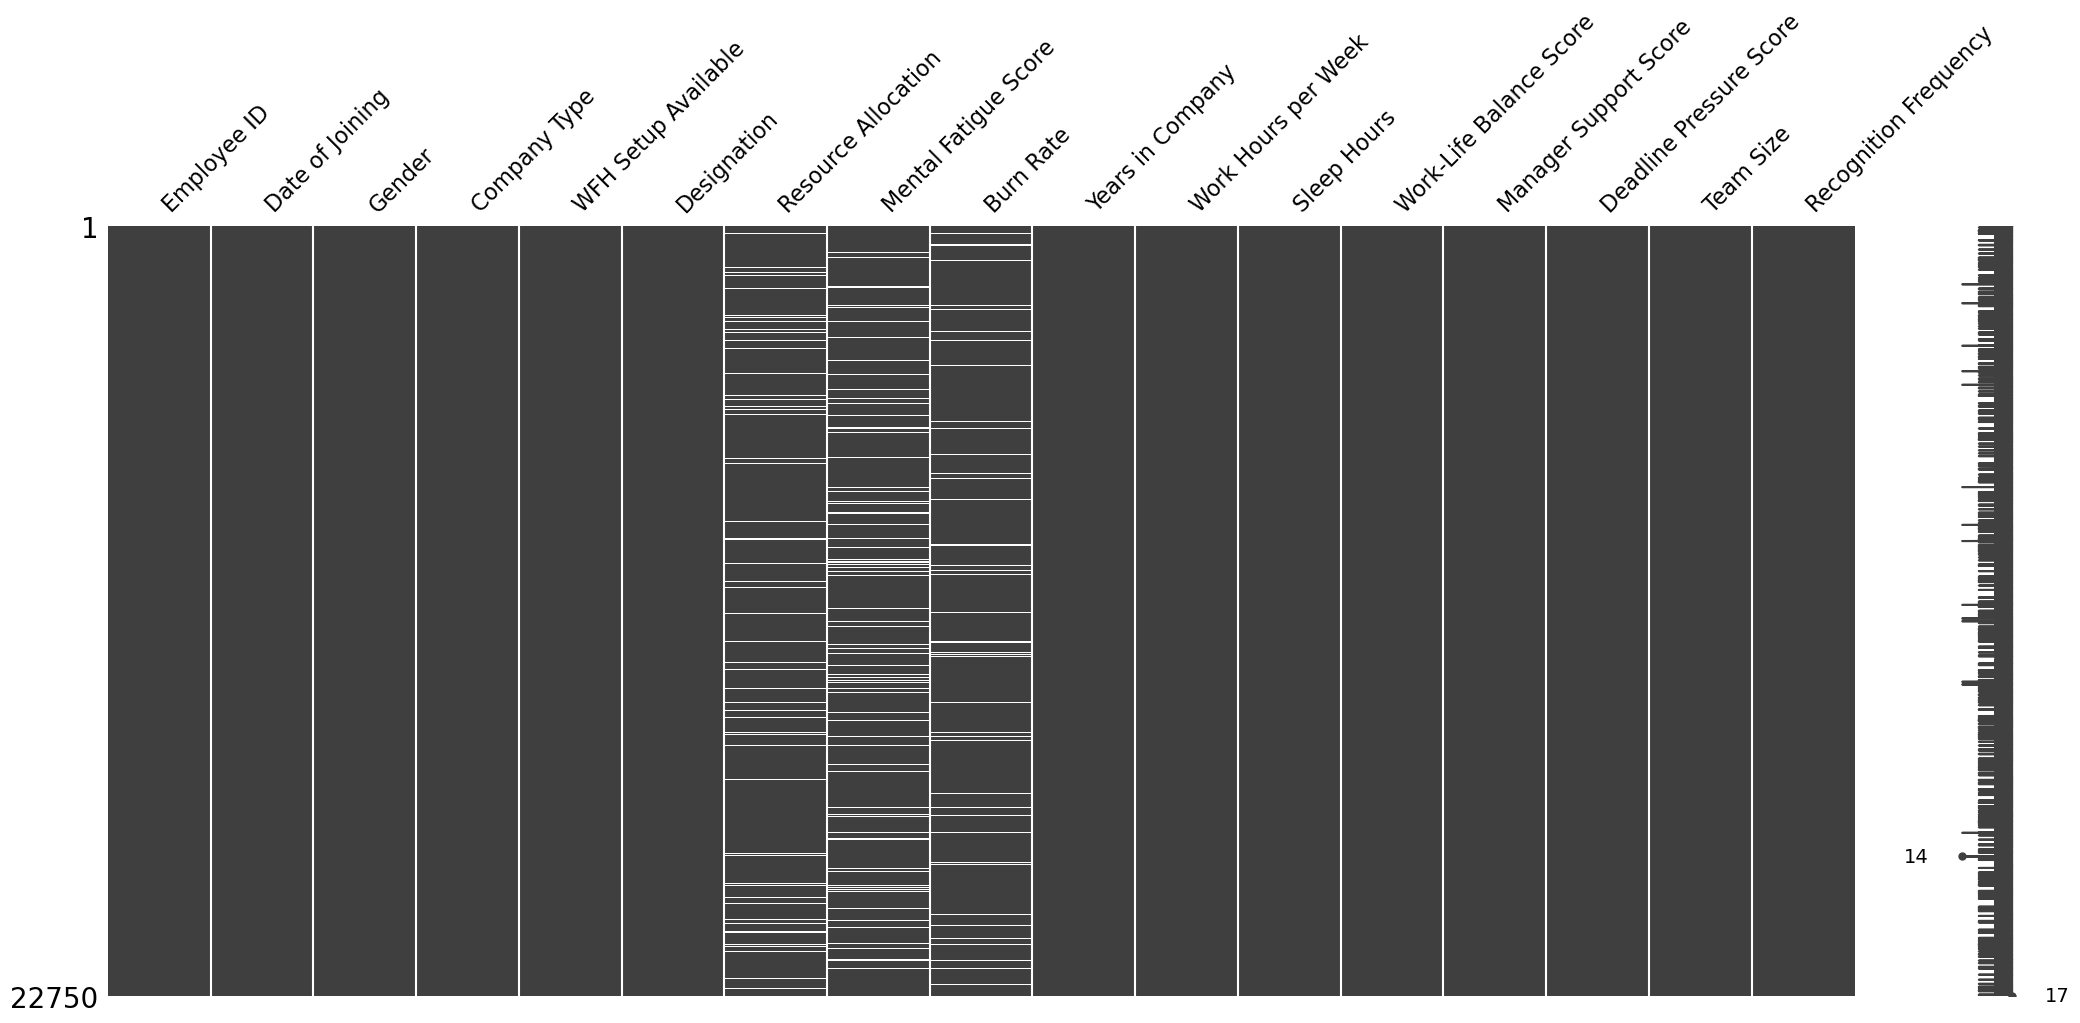

In [12]:
# Visualización de valores faltantes
import missingno as msno
msno.matrix(df_csv)

In [13]:
# Eliminar registros con valores faltantes críticos
# Ver cuántas filas tienen al menos un nulo
print("Filas con al menos un nulo:", df_csv.isna().any(axis=1).sum())

Filas con al menos un nulo: 4160


In [14]:
# Ver cuántas filas tienen al menos dos nulos
print("Filas con al menos dos nulos:", df_csv.isna().sum(axis=1).gt(1).sum())

Filas con al menos dos nulos: 447


1. **Más de un nulo:** Se eliminan las observaciones que tengan más de un valor nulo, ya que no representan un alto porcentaje del total y podrían ser datos erróneos o haber distintas razones por las que la persona eligió no responder.

In [28]:
# Eliminar filas con dos nulos
df_limpio = df_csv.dropna(thresh=len(df_csv.columns)-1)
print("Filas restantes tras eliminación:", df_limpio.shape[0])

Filas restantes tras eliminación: 22303


In [29]:
# Comparar antes y después
print("Valores nulos antes de limpieza:\n", df_csv[['Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']].isnull().sum())
print("Valores nulos después de limpieza:\n", df_limpio[['Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']].isnull().sum())

Valores nulos antes de limpieza:
 Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64
Valores nulos después de limpieza:
 Resource Allocation     1091
Mental Fatigue Score    1758
Burn Rate                864
dtype: int64


In [30]:
# Registros restantes en el dataset luego de la limpieza de registros nulos
print("% registros restantes en el dataset:", round((df_limpio.shape[0] / df_csv.shape[0])*100,2),"%")

% registros restantes en el dataset: 98.04 %


2. **Burn Rate:** Al tratarse de la variable de salida, sería incorrecto imputarle algún valor, ya que esto tendría una gran repercusión en los resultados del modelo y podríamos estar introduciendo ruido. Por esta razón, se eliminan las filas con valores nulos en Burn Rate.

In [31]:
# Eliminar filas con valor nulo en Burn Rate
df_limpio = df_limpio.dropna(subset=['Burn Rate'])
print("Filas restantes tras eliminación:", df_limpio.shape[0])

Filas restantes tras eliminación: 21439


In [32]:
# Comparar antes y después
print("Valores nulos antes de limpieza:\n", df_csv[['Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']].isnull().sum())
print("Valores nulos después de limpieza:\n", df_limpio[['Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']].isnull().sum())

Valores nulos antes de limpieza:
 Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64
Valores nulos después de limpieza:
 Resource Allocation     1091
Mental Fatigue Score    1758
Burn Rate                  0
dtype: int64


In [33]:
# Registros restantes en el dataset luego de la limpieza de registros nulos
print("% registros restantes en el dataset:", round((df_limpio.shape[0] / df_csv.shape[0])*100,2),"%")

% registros restantes en el dataset: 94.24 %


2. **Resource Allocation:** Se analiza la relación entre Resource Allocation y otras variables, para evaluar cuál sería la mejor estrategia para los valores nulos.

In [34]:
# Se analiza si hay algún valor de las otras variables que se mantenga constante para los nulos de 'Resource Allocation'
nulos_ra = df_limpio[df_limpio['Resource Allocation'].isnull()]
nulos_ra = nulos_ra.drop(columns=['Employee ID', 'Date of Joining','Years in Company','Resource Allocation'])
nulos_ra.head(15)


,Gender,Company Type,WFH Setup Available,Designation,Mental Fatigue Score,Burn Rate,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
2,Female,Product,Yes,2,5.8,0.49,53,5.7,2,3,5,17,0
23,Female,Product,Yes,3,7.7,0.61,49,5.2,1,1,4,17,1
25,Female,Service,Yes,3,5.8,0.40,41,7.1,5,5,1,13,5
48,Female,Product,No,3,7.7,0.61,48,6.2,2,1,5,6,1
61,Male,Product,No,3,8.0,0.68,52,5.9,1,1,5,6,1
99,Female,Service,Yes,2,6.7,0.44,51,5.4,1,3,4,8,0
118,Female,Product,No,2,7.8,0.67,50,5.6,2,1,4,4,0
129,Female,Product,Yes,4,8.9,0.76,53,5.1,1,3,5,3,1
222,Female,Service,No,3,5.8,0.47,51,6.0,2,1,4,19,0
252,Male,Product,Yes,3,7.3,0.63,57,5.3,2,1,5,11,0


3. **Mental Fatigue Score:** Se analiza la relación entre Mental Fatigue Score y otras variables, para evaluar cuál sería la mejor estrategia para los valores nulos.

In [35]:
nulos_mfs = df_limpio[df_limpio['Mental Fatigue Score'].isnull()]
nulos_mfs = nulos_mfs.drop(columns=['Employee ID', 'Date of Joining','Years in Company','Mental Fatigue Score'])
nulos_mfs.head(15)

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Burn Rate,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
8,Female,Service,No,3,6.0,0.56,50,5.0,1,2,4,16,1
9,Female,Product,No,3,6.0,0.67,58,4.5,2,3,4,12,0
12,Male,Service,Yes,2,5.0,0.40,40,7.6,3,5,1,9,4
13,Female,Product,No,1,3.0,0.33,39,6.5,4,4,3,8,4
19,Female,Service,No,3,5.0,0.68,55,6.2,1,2,5,18,1
24,Female,Service,No,3,8.0,0.91,59,5.5,1,1,5,17,1
29,Female,Service,Yes,2,4.0,0.45,50,4.9,1,1,4,11,1
40,Female,Service,Yes,3,5.0,0.50,49,4.9,1,1,4,8,1
77,Female,Product,Yes,0,1.0,0.04,36,7.2,5,4,2,13,2
92,Male,Product,No,4,9.0,0.76,57,5.4,1,1,5,14,1


**Análisis de histogramas de Resource Allocation y Mental Fatigue Score:** Se evalúa la distribución de los datos para 'Resource Allocation' y 'Mental Fatigue Score' para evaluar si se pueden imputar. 
- Mental Fatigue Score: se observa una distribución con un pico, por lo que en una primera instancia se propone imputar con una constante estadística (en este caso la mediana, en línea punteada azul). 
- Resource Allocation: se evalúa la correlación con otras variables para evaluar otras estrategias de imputación.

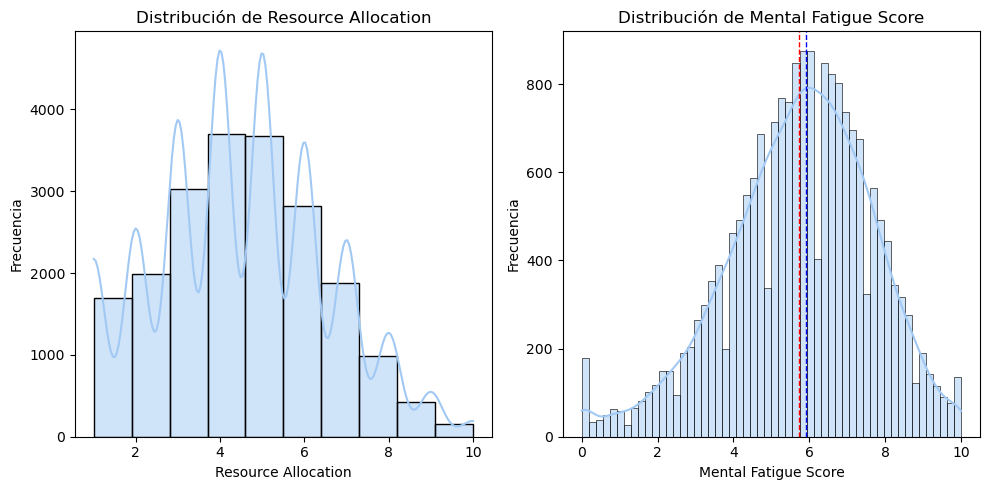

In [36]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_limpio['Resource Allocation'], bins=10, kde=True)
plt.title('Distribución de Resource Allocation')
plt.xlabel('Resource Allocation')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df_limpio['Mental Fatigue Score'], bins='auto', kde=True)
plt.axvline(df_limpio['Mental Fatigue Score'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(df_limpio['Mental Fatigue Score'].median(), color='blue', linestyle='dashed', linewidth=1, label='Mediana')
plt.title('Distribución de Mental Fatigue Score')
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


C:\Users\elipa\AppData\Local\Temp\ipykernel_4120\257990326.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio_MFSmedian['Mental Fatigue Score'].fillna(df_limpio_MFSmedian['Mental Fatigue Score'].median(), inplace=True)


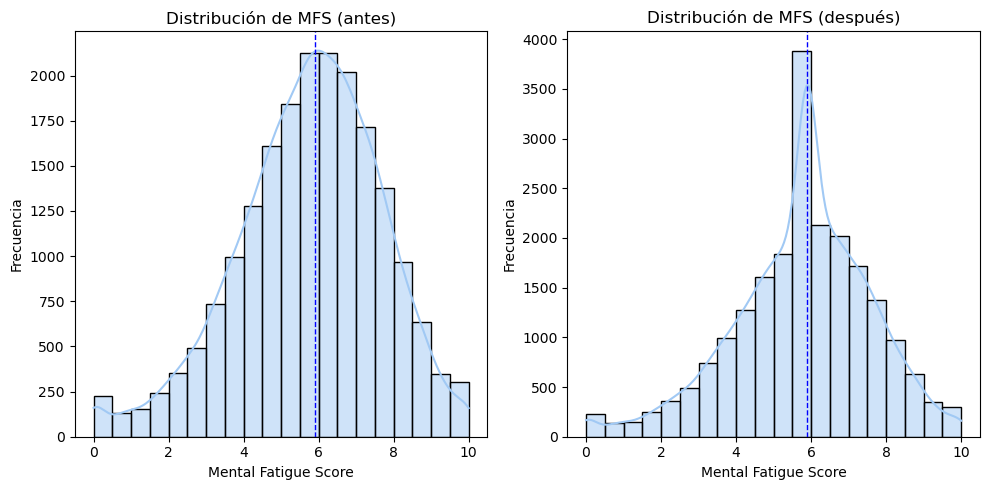

In [37]:
# Imputar valores nulos de Mental Fatigue Score con la mediana y comparar histograma antes y después
df_limpio_MFSmedian = df_limpio.copy()
df_limpio_MFSmedian['Mental Fatigue Score'].fillna(df_limpio_MFSmedian['Mental Fatigue Score'].median(), inplace=True)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_limpio['Mental Fatigue Score'], bins=20, kde=True)
plt.axvline(df_limpio['Mental Fatigue Score'].median(), color='blue', linestyle='dashed', linewidth=1, label='Mediana')
plt.title('Distribución de MFS (antes)')
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df_limpio_MFSmedian['Mental Fatigue Score'], bins=20, kde=True)
plt.axvline(df_limpio_MFSmedian['Mental Fatigue Score'].median(), color='blue', linestyle='dashed', linewidth=1, label='Mediana')
plt.title('Distribución de MFS (después)')
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


In [38]:
# Convertir las columnas object a category para poder analizar la correlación entre variables
# Se considera como variables útiles para este análisis 'Gender', 'Company Type', 'WFH Setup Available'
# Crear una copia del dataset limpio
df_limpio_codes = df_limpio.copy()

# Convertir columnas categóricas a códigos numéricos
categorical_columns = ['Gender', 'Company Type', 'WFH Setup Available']

for col in categorical_columns:
    df_limpio_codes[col] = df_limpio_codes[col].astype('category').cat.codes

# Verificar
df_limpio_codes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21439 entries, 0 to 22749
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employee ID              21439 non-null  object 
 1   Date of Joining          21439 non-null  object 
 2   Gender                   21439 non-null  int8   
 3   Company Type             21439 non-null  int8   
 4   WFH Setup Available      21439 non-null  int8   
 5   Designation              21439 non-null  int64  
 6   Resource Allocation      20348 non-null  float64
 7   Mental Fatigue Score     19681 non-null  float64
 8   Burn Rate                21439 non-null  float64
 9   Years in Company         21439 non-null  int64  
 10  Work Hours per Week      21439 non-null  int64  
 11  Sleep Hours              21439 non-null  float64
 12  Work-Life Balance Score  21439 non-null  int64  
 13  Manager Support Score    21439 non-null  int64  
 14  Deadline Pressure Score  21

Observando los histogramas, podemos ver que la distribución se modifica demasiado al imputar con la mediana, generándose una deformación en la curva. Por esta razón, se decide evaluar la correlación con otras variables tanto para Mental Fatigue Score como para Resource Allocation y proponer imputar los valores nulos utilizando una regresión lineal.

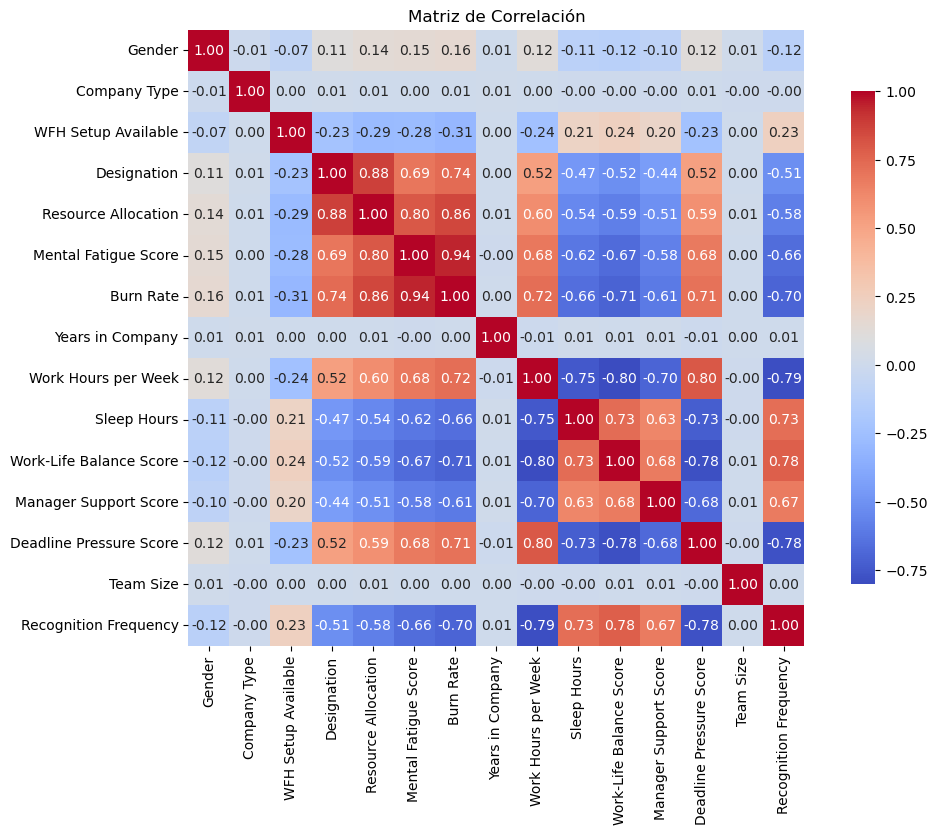

In [39]:
# Evaluar correlación entre 'Resource Allocation' y 'Mental Fatigue Score' y otras variables
# Obtener matriz de correlación
correlation_matrix = df_limpio_codes.corr(numeric_only=True)
# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.show()

Observando ma matriz de correlación, las variables que estaban como 'object' y que dieron transformadas a 'category' y luego a 'int8', no miuestran tener una correlación significativa con 'Mental Fatigue Score' y con Resource Allocation'. Por lo tanto, se decide avanzar con el dataset [df_limpio] anterior a la conversión de estas variables object, ya que no van a ser utilizadas como variables predictoras para la correlación lineal. Más adelante, previoluego de la imputación de nulos, se retomará este tema para convertir estas variables a 'category'.

### Imputación de 'Mental Fatigue Score' con Regresión Lineal

#### Objetivo:
Imputar los valores faltantes de la variable **'Mental Fatigue Score'** utilizando un modelo de **regresión lineal** basado en las variables con mayor correlación.

### Comparación de Modelos de Imputación para 'Mental Fatigue Score'

#### Objetivo:
Evaluar si la incorporación de variables con **alta correlación negativa** con 'Mental Fatigue Score' mejora el desempeño del modelo de regresión lineal utilizado para la imputación de valores faltantes.

#### Modelos evaluados:

1. **Modelo Simple:**
   - Incluye las 5 variables con **alta correlación positiva** con 'Mental Fatigue Score':
     - `Burn Rate`
     - `Resource Allocation`
     - `Designation`
     - `Work Hours per Week`
     - `Deadline Pressure Score`

2. **Modelo Extendido:**
   - Además de las 5 anteriores, se agregan las variables con **alta correlación negativa**:
     - `Sleep Hours`
     - `Work-Life Balance Score`
     - `Recognition Frequency`
     - `Manager Support Score`

#### Métricas de Evaluación:
Se utilizaron tres métricas principales para comparar ambos modelos:
- **R² (Coeficiente de Determinación):** mide qué proporción de la variabilidad es explicada por el modelo.
- **RMSE (Root Mean Squared Error):** error cuadrático medio, penaliza más los errores grandes.
- **MAE (Mean Absolute Error):** error absoluto medio, mide el error promedio sin penalizar tanto los grandes.

In [46]:
# 1. Preparación del dataset con datos completos para entrenamiento y evaluación para el 'Modelo Simple'

df_mf_train = df_limpio[
    df_limpio['Mental Fatigue Score'].notnull() &
    df_limpio['Designation'].notnull() &
    df_limpio['Resource Allocation'].notnull() &
    df_limpio['Burn Rate'].notnull() &
    df_limpio['Work Hours per Week'].notnull() &
    df_limpio['Deadline Pressure Score'].notnull()
]

# Definir variables independientes y dependiente
X_mf = df_mf_train[['Designation', 'Resource Allocation', 'Burn Rate', 'Work Hours per Week', 'Deadline Pressure Score']]
y_mf = df_mf_train['Mental Fatigue Score']

In [47]:
# 2. Entrenar el modelo y evaluar la capacidad predictiva

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

# Dividir en train y test para evaluar
X_train, X_test, y_train, y_test = train_test_split(
    X_mf, y_mf, test_size=0.2, random_state=42
)

# Crear y entrenar el modelo
model_mf = LinearRegression()
model_mf.fit(X_train, y_train)

# Predicción en set de test
y_pred = model_mf.predict(X_test)

# Evaluación
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


R²: 0.8914
RMSE: 0.6289
MAE: 0.5313


In [48]:
# Dataset extendido con variables de correlación negativa
X_mf_maspredic = df_mf_train[['Designation', 'Resource Allocation', 'Burn Rate', 'Work Hours per Week',
                               'Deadline Pressure Score', 'Sleep Hours', 'Work-Life Balance Score',
                               'Recognition Frequency', 'Manager Support Score']]

# Target
y_mf_maspredic = df_mf_train['Mental Fatigue Score']

# División en train/test
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_mf_maspredic, y_mf_maspredic, test_size=0.2, random_state=42
)

# Entrenar el modelo
model_mf2 = LinearRegression()
model_mf2.fit(X_train2, y_train2)

# Predicción
y_pred2 = model_mf2.predict(X_test2)

# Métricas
r2_2 = r2_score(y_test2, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y_test2, y_pred2))
mae_2 = mean_absolute_error(y_test2, y_pred2)

print(f"Modelo extendido:")
print(f"R²: {r2_2:.4f}")
print(f"RMSE: {rmse_2:.4f}")
print(f"MAE: {mae_2:.4f}")


Modelo extendido:
R²: 0.8914
RMSE: 0.6289
MAE: 0.5313


In [49]:
print(f"Modelo simple → R²: {r2:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f}")
print(f"Modelo extendido → R²: {r2_2:.4f} | RMSE: {rmse_2:.4f} | MAE: {mae_2:.4f}")

Modelo simple → R²: 0.8914 | RMSE: 0.6289 | MAE: 0.5313
Modelo extendido → R²: 0.8914 | RMSE: 0.6289 | MAE: 0.5313


### Resultados Comparativos Finales:

| Modelo             | R²    | RMSE   | MAE   |
|--------------------|-------|--------|-------|
| **Modelo Simple**  | 0.8914| 0.6289 | 0.5313|
| **Modelo Extendido**| 0.8914| 0.6289 | 0.5313|

### Conclusión:
- No se observa mejora al incorporar las variables con correlación negativa (`Sleep Hours`, `Work-Life Balance Score`, `Recognition Frequency`, `Manager Support Score`).
- Esto sugiere que las 5 variables principales (`Burn Rate`, `Resource Allocation`, `Designation`, `Work Hours per Week`, `Deadline Pressure Score`) contienen toda la información relevante para explicar la variación en `Mental Fatigue Score` dentro de un modelo lineal.
- Las variables adicionales podrían aportar valor en modelos no lineales o en análisis complementarios, pero no mejoran la predicción bajo un enfoque lineal.

In [50]:
# 3. Imputación de los valores faltantes de 'Mental Fatigue Score' usando el modelo entrenado ('Modelo simple')

# Filtrar registros con Mental Fatigue Score nulo pero con las otras variables presentes
df_mf_pred = df_limpio[
    df_limpio['Mental Fatigue Score'].isnull() &
    df_limpio['Designation'].notnull() &
    df_limpio['Resource Allocation'].notnull() &
    df_limpio['Burn Rate'].notnull() &
    df_limpio['Work Hours per Week'].notnull() &
    df_limpio['Deadline Pressure Score'].notnull()
]

X_mf_pred = df_mf_pred[['Designation', 'Resource Allocation', 'Burn Rate', 'Work Hours per Week', 'Deadline Pressure Score']]

# Crear una copia del dataframe limpio para guardar los datos imputados
df_limpio_MFS_LR = df_limpio.copy()

# Aplicar la imputación
df_limpio_MFS_LR.loc[df_mf_pred.index, 'Mental Fatigue Score'] = model_mf.predict(X_mf_pred)


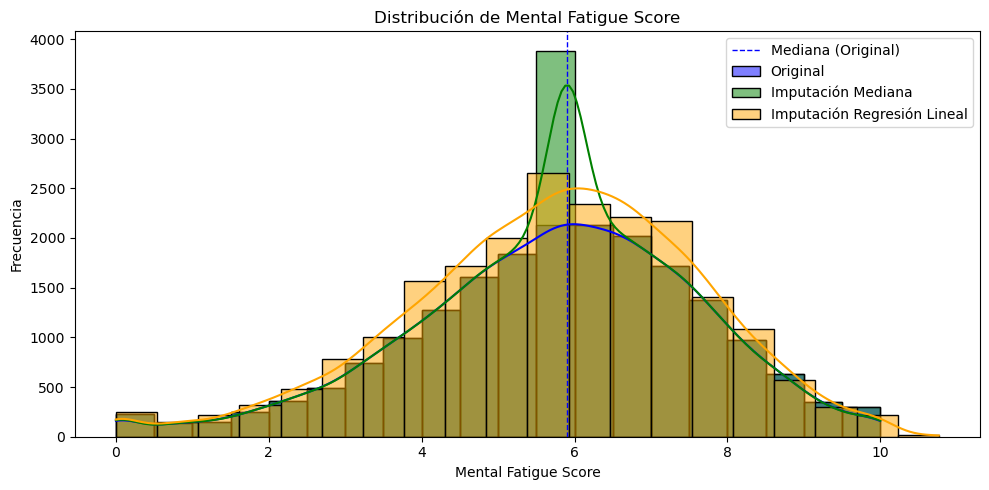

In [51]:
# 4. Graficar histograma de 'Mental Fatigue Score' original, con imputación por mediana y con imputación por regresión lineal

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Original
sns.histplot(df_limpio['Mental Fatigue Score'], bins=20, kde=True, label='Original', color='blue')
plt.axvline(df_limpio['Mental Fatigue Score'].median(), color='blue', linestyle='dashed', linewidth=1, label='Mediana (Original)')

# Con imputación por mediana (si lo tenés guardado)
sns.histplot(df_limpio_MFSmedian['Mental Fatigue Score'], bins=20, kde=True, label='Imputación Mediana', color='green')

# Con imputación por regresión
sns.histplot(df_limpio_MFS_LR['Mental Fatigue Score'], bins=20, kde=True, label='Imputación Regresión Lineal', color='orange')

plt.title('Distribución de Mental Fatigue Score')
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()

### Imputación de 'Mental Fatigue Score' con Regresión Lineal

#### Proceso realizado:

1. **Entrenamiento del modelo:**
   - Usando datos completos en las variables seleccionadas.
   - División en entrenamiento (80%) y prueba (20%).

#### Comparación de modelos:
Se evaluaron dos modelos:
- **Modelo simple**, con las 5 variables de mayor correlación positiva.
- **Modelo extendido**, que además incluía las variables con alta correlación negativa:
  - `Sleep Hours`
  - `Work-Life Balance Score`
  - `Recognition Frequency`
  - `Manager Support Score`

2. **Evaluación del modelo:**
   - Se calcularon las métricas:
     - **R²** (coeficiente de determinación)
     - **RMSE** (Root Mean Squared Error)
     - **MAE** (Mean Absolute Error)
   - Esto permitió validar que el modelo tenía una capacidad predictiva adecuada.

3. **Imputación:**
   - Se aplicó el modelo entrenado para predecir los valores faltantes de 'Mental Fatigue Score'.

4. **Comparación de distribuciones:**
   - Se graficaron histogramas de 'Mental Fatigue Score' en tres escenarios:
     - Dataset original (con faltantes).
     - Imputación por mediana.
     - Imputación por regresión lineal.

#### Justificación del enfoque:
- Esta metodología permite realizar una imputación informada, basada en las relaciones existentes dentro del dataset.
- A diferencia de métodos simples como la media o mediana, la regresión lineal tiene en cuenta múltiples variables asociadas, logrando una imputación más precisa y consistente.

#### Conclusiones:
Se observa que la forma de la curva se mantiene al utilizar Regresión lineal, a diferencia de la imputación por mediana, que genera una deformación notoria en la distribución. Por esta razón, se decide utilizar este enfoque para imputar los valores nulos de MFS. 

El mismo enfoque se aplica a continuación para Resource Allocation:

In [52]:
# 1. Preparación del dataset con datos completos para entrenamiento y evaluación para el 'Modelo Simple'
# Dataset para entrenamiento y evaluación (sin nulos en variables predictoras y target)

df_ra_train = df_limpio[
    df_limpio['Resource Allocation'].notnull() &
    df_limpio['Designation'].notnull() &
    df_limpio['Burn Rate'].notnull() &
    df_limpio['Mental Fatigue Score'].notnull() &
    df_limpio['Work Hours per Week'].notnull() &
    df_limpio['Deadline Pressure Score'].notnull()
]

# Variables predictoras - Modelo simple
X_ra = df_ra_train[['Designation', 'Burn Rate', 'Mental Fatigue Score',
                     'Work Hours per Week', 'Deadline Pressure Score']]
y_ra = df_ra_train['Resource Allocation']

In [54]:
# 2. Entrenar el modelo y evaluar la capacidad predictiva
# División en train/test
X_train_ra, X_test_ra, y_train_ra, y_test_ra = train_test_split(
    X_ra, y_ra, test_size=0.2, random_state=42
)

# Modelo
model_ra = LinearRegression()
model_ra.fit(X_train_ra, y_train_ra)

# Predicción
y_pred_ra = model_ra.predict(X_test_ra)

# Métricas
r2_ra = r2_score(y_test_ra, y_pred_ra)
rmse_ra = np.sqrt(mean_squared_error(y_test_ra, y_pred_ra))
mae_ra = mean_absolute_error(y_test_ra, y_pred_ra)

print(f"Modelo Simple → R²: {r2_ra:.4f} | RMSE: {rmse_ra:.4f} | MAE: {mae_ra:.4f}")

Modelo Simple → R²: 0.8698 | RMSE: 0.7357 | MAE: 0.5945


In [57]:
X_ra_ext = df_ra_train[['Designation', 'Burn Rate', 'Mental Fatigue Score',
                         'Work Hours per Week', 'Deadline Pressure Score',
                         'Sleep Hours', 'Work-Life Balance Score',
                         'Recognition Frequency', 'Manager Support Score']]

# División train/test
X_train_ra_ext, X_test_ra_ext, y_train_ra_ext, y_test_ra_ext = train_test_split(
    X_ra_ext, y_ra, test_size=0.2, random_state=42
)

# Modelo extendido
model_ra_ext = LinearRegression()
model_ra_ext.fit(X_train_ra_ext, y_train_ra_ext)

# Predicción
y_pred_ra_ext = model_ra_ext.predict(X_test_ra_ext)

# Métricas extendido
r2_ra_ext = r2_score(y_test_ra_ext, y_pred_ra_ext)
rmse_ra_ext = np.sqrt(mean_squared_error(y_test_ra_ext, y_pred_ra_ext))
mae_ra_ext = mean_absolute_error(y_test_ra_ext, y_pred_ra_ext)

print(f"Modelo Extendido → R²: {r2_ra_ext:.4f} | RMSE: {rmse_ra_ext:.4f} | MAE: {mae_ra_ext:.4f}")

Modelo Extendido → R²: 0.8698 | RMSE: 0.7356 | MAE: 0.5942


In [58]:
print(f"Modelo simple → R²: {r2_ra:.4f} | RMSE: {rmse_ra:.4f} | MAE: {mae_ra:.4f}")
print(f"Modelo extendido → R²: {r2_ra_ext:.4f} | RMSE: {rmse_ra_ext:.4f} | MAE: {mae_ra_ext:.4f}")

Modelo simple → R²: 0.8698 | RMSE: 0.7357 | MAE: 0.5945
Modelo extendido → R²: 0.8698 | RMSE: 0.7356 | MAE: 0.5942


### Resultados Comparativos Finales:

| Modelo             | R²    | RMSE   | MAE   |
|--------------------|-------|--------|-------|
| **Modelo Simple**  | 0.8698| 0.7357 | 0.5945|
| **Modelo Extendido**| 0.8698| 0.7356 | 0.5945|

### Conclusión:
- No se observa mejora al incorporar las variables con correlación negativa (`Sleep Hours`, `Work-Life Balance Score`, `Recognition Frequency`, `Manager Support Score`).
- Esto sugiere que las 5 variables principales (`Burn Rate`, `Resource Allocation`, `Designation`, `Work Hours per Week`, `Deadline Pressure Score`) contienen toda la información relevante para explicar la variación en `Resource Allocation` dentro de un modelo lineal.
- Las variables adicionales podrían aportar valor en modelos no lineales o en análisis complementarios, pero no mejoran la predicción bajo un enfoque lineal.

In [62]:
# 3. Imputación de los valores faltantes de 'Resource Allocation' usando el modelo entrenado ('Modelo simple')
df_limpio=df_limpio_MFS_LR.copy()

# Filas completas para entrenamiento
df_ra_train = df_limpio[df_limpio['Resource Allocation'].notnull() &
                 df_limpio['Designation'].notnull() &
                 df_limpio['Mental Fatigue Score'].notnull() &
                 df_limpio['Burn Rate'].notnull() &
                 df_limpio['Work Hours per Week'].notnull()]

X_ra = df_ra_train[['Designation', 'Mental Fatigue Score', 'Burn Rate',
                    'Work Hours per Week']]
y_ra = df_ra_train['Resource Allocation']

model_ra = LinearRegression()
model_ra.fit(X_ra, y_ra)

# Predecir valores nulos
df_ra_pred = df_limpio[df_limpio['Resource Allocation'].isnull() &
                df_limpio['Designation'].notnull() &
                df_limpio['Mental Fatigue Score'].notnull() &
                df_limpio['Burn Rate'].notnull() &
                df_limpio['Work Hours per Week'].notnull()]

X_ra_pred = df_ra_pred[['Designation', 'Mental Fatigue Score', 'Burn Rate',
                        'Work Hours per Week']]

df_limpio_RA_LR=df_limpio.copy()
df_limpio_RA_LR.loc[df_ra_pred.index, 'Resource Allocation'] = model_ra.predict(X_ra_pred)


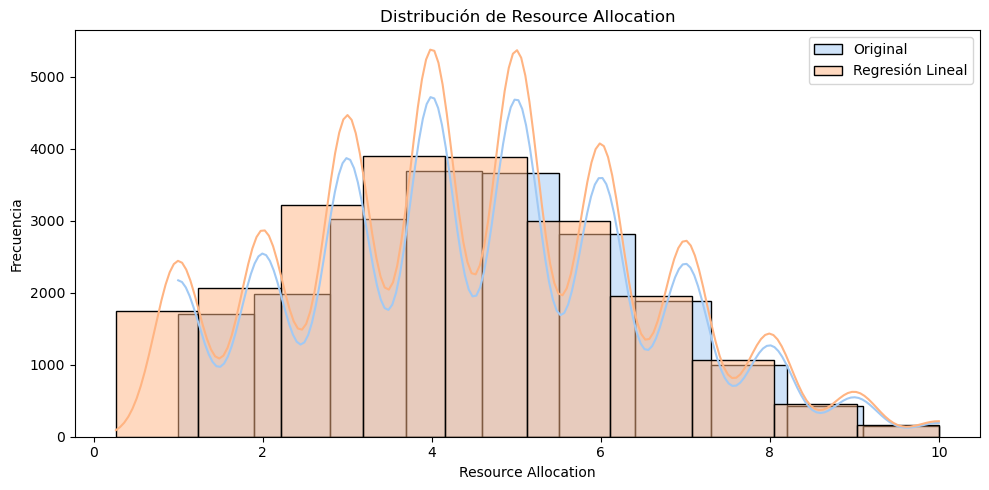

In [63]:
# 4. Comparar histogramas de 'Resource Allocation' original y con imputación por regresión lineal
plt.figure(figsize=(10, 5))
sns.histplot(df_limpio['Resource Allocation'], bins=10, kde=True, label='Original')
sns.histplot(df_limpio_RA_LR['Resource Allocation'], bins=10, kde=True, label='Regresión Lineal')
plt.title('Distribución de Resource Allocation')
plt.xlabel('Resource Allocation')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()

Se observa que la distribución original de Resource Allocation y la imputada utilizando la regresión lineal presentan una forma similar, por lo que se aplicará esta imputación.

In [64]:
df_limpio=df_limpio_RA_LR.copy()

# Registros restantes en el dataset luego de la limpieza de registros nulos
print("% registros restantes en el dataset:", round((df_limpio.shape[0] / df_csv.shape[0])*100,2),"%")

% registros restantes en el dataset: 94.24 %


<Axes: >

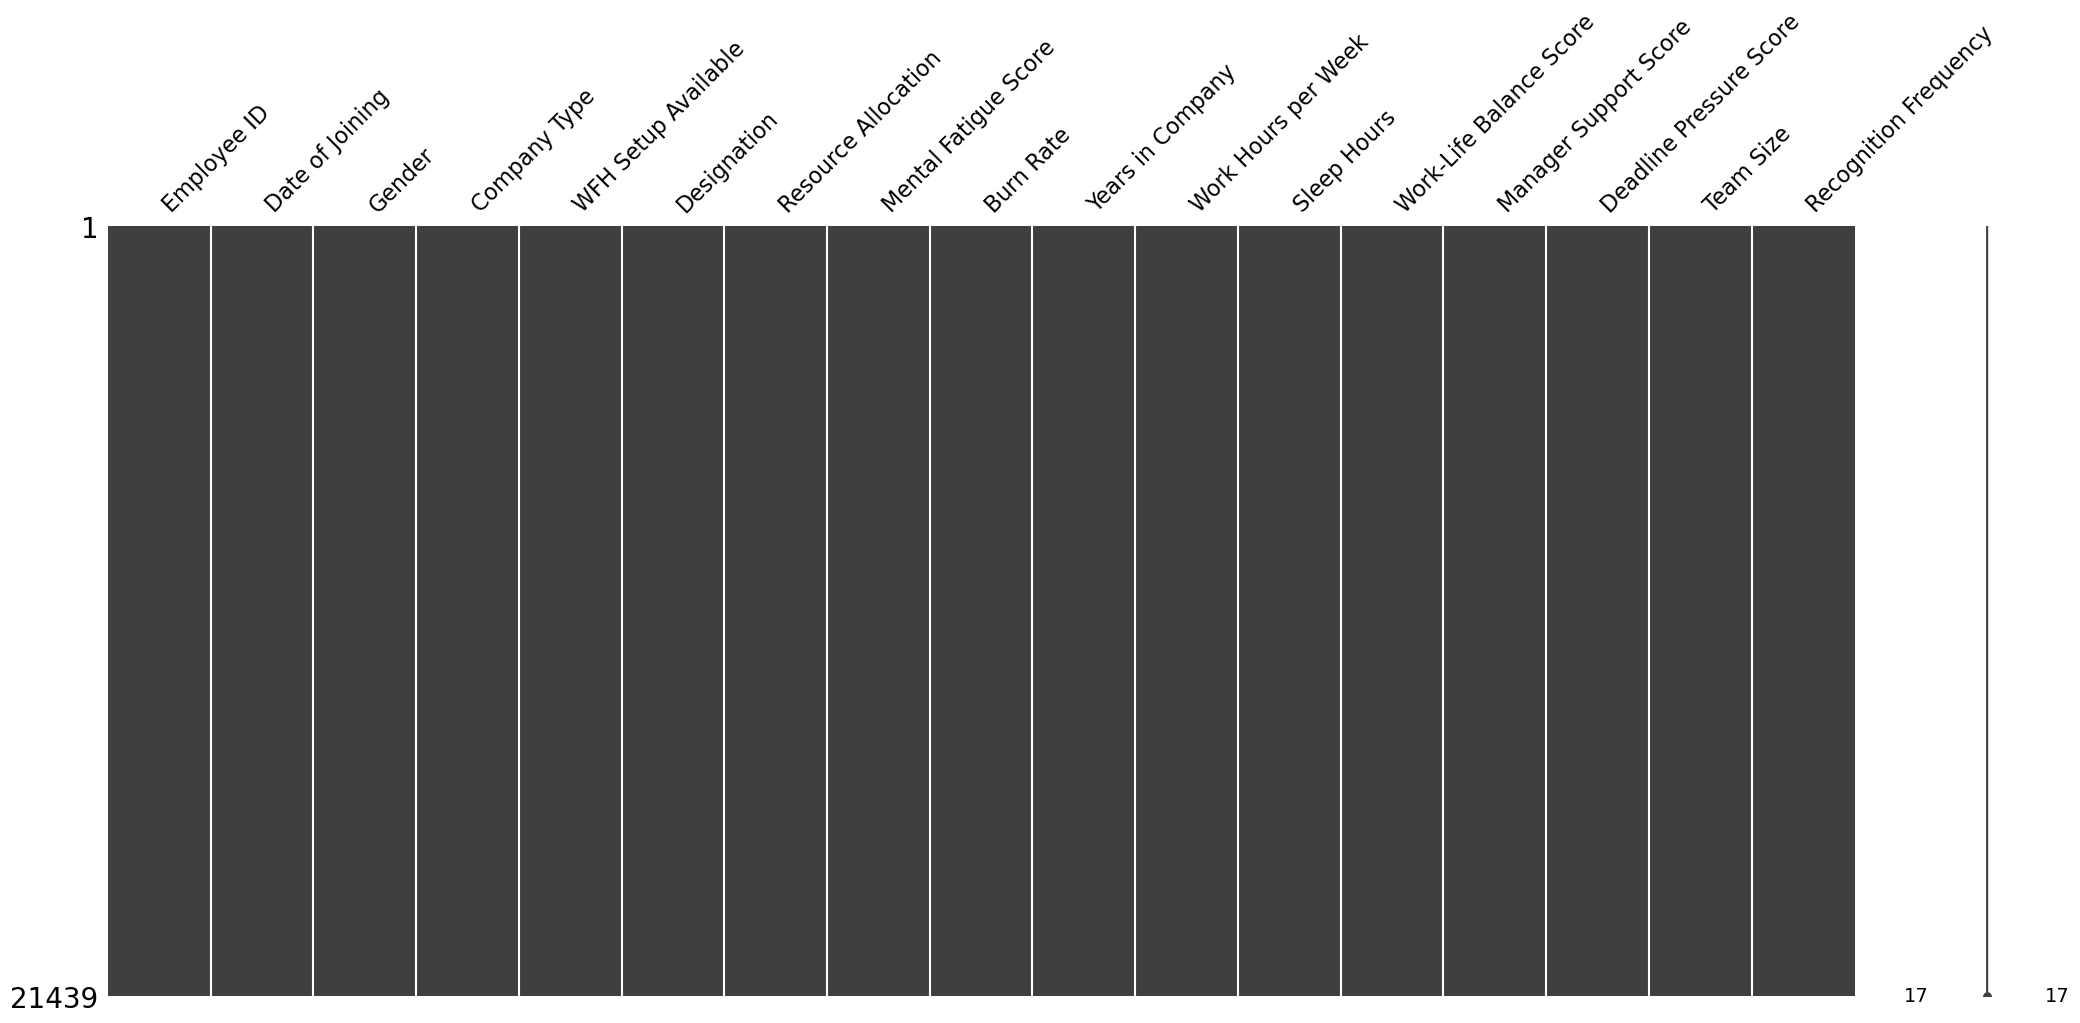

In [65]:
msno.matrix(df_limpio)

#### 2.2 Limpieza de datos: valores duplicados

In [66]:
print("Cantidad de datos duplicados:", df_limpio.duplicated().sum())

Cantidad de datos duplicados: 0


#### 2.3 Limpieza de datos: ajustar tipo de datos adecuado para el análisis

In [67]:
print(f"Columnas del dataframe:\n{df_limpio.dtypes}\n")

Columnas del dataframe:
Employee ID                 object
Date of Joining             object
Gender                      object
Company Type                object
WFH Setup Available         object
Designation                  int64
Resource Allocation        float64
Mental Fatigue Score       float64
Burn Rate                  float64
Years in Company             int64
Work Hours per Week          int64
Sleep Hours                float64
Work-Life Balance Score      int64
Manager Support Score        int64
Deadline Pressure Score      int64
Team Size                    int64
Recognition Frequency        int64
dtype: object



In [68]:
# Convertir columna de fecha a tipo datetime 
df_limpio['Date of Joining'] = pd.to_datetime(df_limpio['Date of Joining'], format="%Y-%m-%d")
df_limpio.dtypes

Employee ID                        object
Date of Joining            datetime64[ns]
Gender                             object
Company Type                       object
WFH Setup Available                object
Designation                         int64
Resource Allocation               float64
Mental Fatigue Score              float64
Burn Rate                         float64
Years in Company                    int64
Work Hours per Week                 int64
Sleep Hours                       float64
Work-Life Balance Score             int64
Manager Support Score               int64
Deadline Pressure Score             int64
Team Size                           int64
Recognition Frequency               int64
dtype: object

In [69]:
df_limpio["Year"] = df_limpio["Date of Joining"].dt.year
df_limpio.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency,Year
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.000000,3.8,0.16,16,35,7.5,3,3,1,16,2,2008
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.000000,5.0,0.36,16,41,7.1,5,3,3,10,5,2008
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,4.479915,5.8,0.49,16,53,5.7,2,3,5,17,0,2008
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.000000,2.6,0.20,16,43,6.7,3,3,1,13,2,2008
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.000000,6.9,0.52,16,51,5.2,1,3,4,18,0,2008


In [70]:
df_limpio['Year'].value_counts()

Year
2008    21439
Name: count, dtype: int64

Se observa que la fecha corresponde probablemente a la fecha en la que realizaron la encuesta, no a la fecha de ingreso a la empresa. Por esta razón, esta columna también podría quitarse, ya que no tendrá incidencia sobre el *Burn Rate*.

In [71]:
# Se genera un nuevo dataset sin las columnas Employee ID, Date of Joining, Year
df = df_limpio.drop(columns=['Employee ID', 'Date of Joining', 'Year'])
df.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
0,Female,Service,No,2,3.000000,3.8,0.16,16,35,7.5,3,3,1,16,2
1,Male,Service,Yes,1,2.000000,5.0,0.36,16,41,7.1,5,3,3,10,5
2,Female,Product,Yes,2,4.479915,5.8,0.49,16,53,5.7,2,3,5,17,0
3,Male,Service,Yes,1,1.000000,2.6,0.20,16,43,6.7,3,3,1,13,2
4,Female,Service,No,3,7.000000,6.9,0.52,16,51,5.2,1,3,4,18,0


### 3. Análisis de las variables categóricas

Se propone evaluar 3 de las variables como categóricas: Género, Tipo de compañía y Posibilidad de trabajo remoto.

Se observa que el dataset se encuentra balanceado para género (con mayoría de mujeres) y para posibilidad de trabajo remoto (con mayoría de "sí"). Con respecto al tipo de compañía sí se observa un mayor desbalance de las clases, con alrededor de 65% de compañías de Servicios y alrededor de 35% de Productos.

In [72]:
df['Gender']=df['Gender'].astype('category')
df['Company Type']=df['Company Type'].astype('category')
df['WFH Setup Available']=df['WFH Setup Available'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21439 entries, 0 to 22749
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   21439 non-null  category
 1   Company Type             21439 non-null  category
 2   WFH Setup Available      21439 non-null  category
 3   Designation              21439 non-null  int64   
 4   Resource Allocation      21439 non-null  float64 
 5   Mental Fatigue Score     21439 non-null  float64 
 6   Burn Rate                21439 non-null  float64 
 7   Years in Company         21439 non-null  int64   
 8   Work Hours per Week      21439 non-null  int64   
 9   Sleep Hours              21439 non-null  float64 
 10  Work-Life Balance Score  21439 non-null  int64   
 11  Manager Support Score    21439 non-null  int64   
 12  Deadline Pressure Score  21439 non-null  int64   
 13  Team Size                21439 non-null  int64   
 14  Recognition

In [74]:
df.describe(include='category')

,Gender,Company Type,WFH Setup Available
count,21439,21439,21439
unique,2,2,2
top,Female,Service,Yes
freq,11253,14014,11587


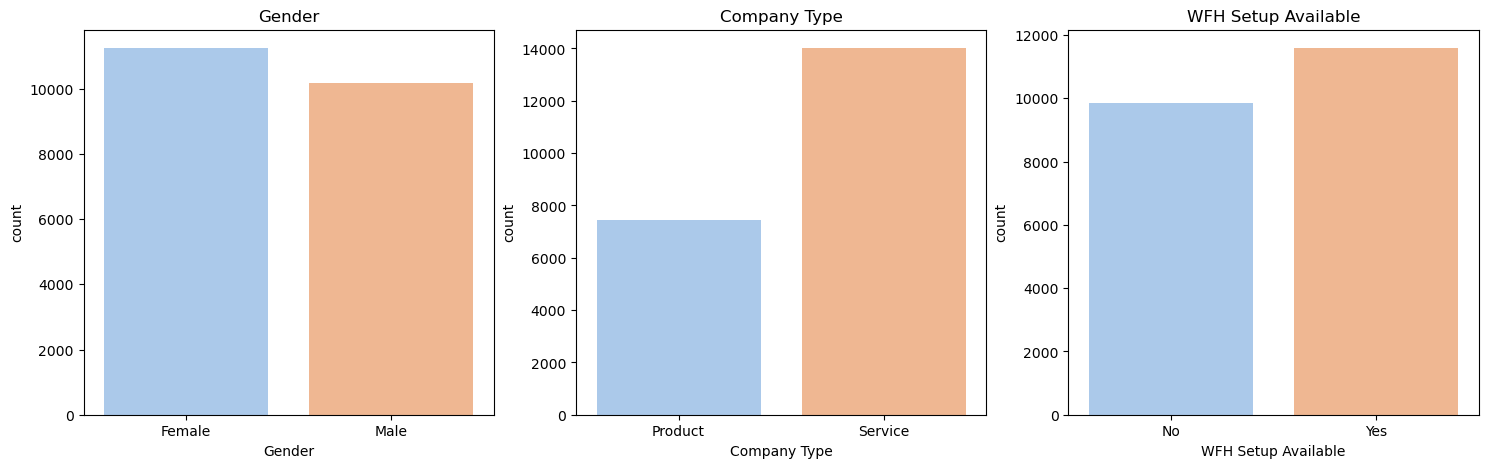

In [75]:
# Gráficos de variables categóricas
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Gráficos de barras de cada una
sns.countplot(x='Gender', data=df, ax=ax[0], hue='Gender')
sns.countplot(x='Company Type', data=df, ax=ax[1], hue='Company Type')
sns.countplot(x='WFH Setup Available', data=df, ax=ax[2], hue='WFH Setup Available')

# Títulos
ax[0].set_title('Gender')
ax[1].set_title('Company Type')
ax[2].set_title('WFH Setup Available')

plt.show()

### 4. Análisis de las variables numéricas y outliers

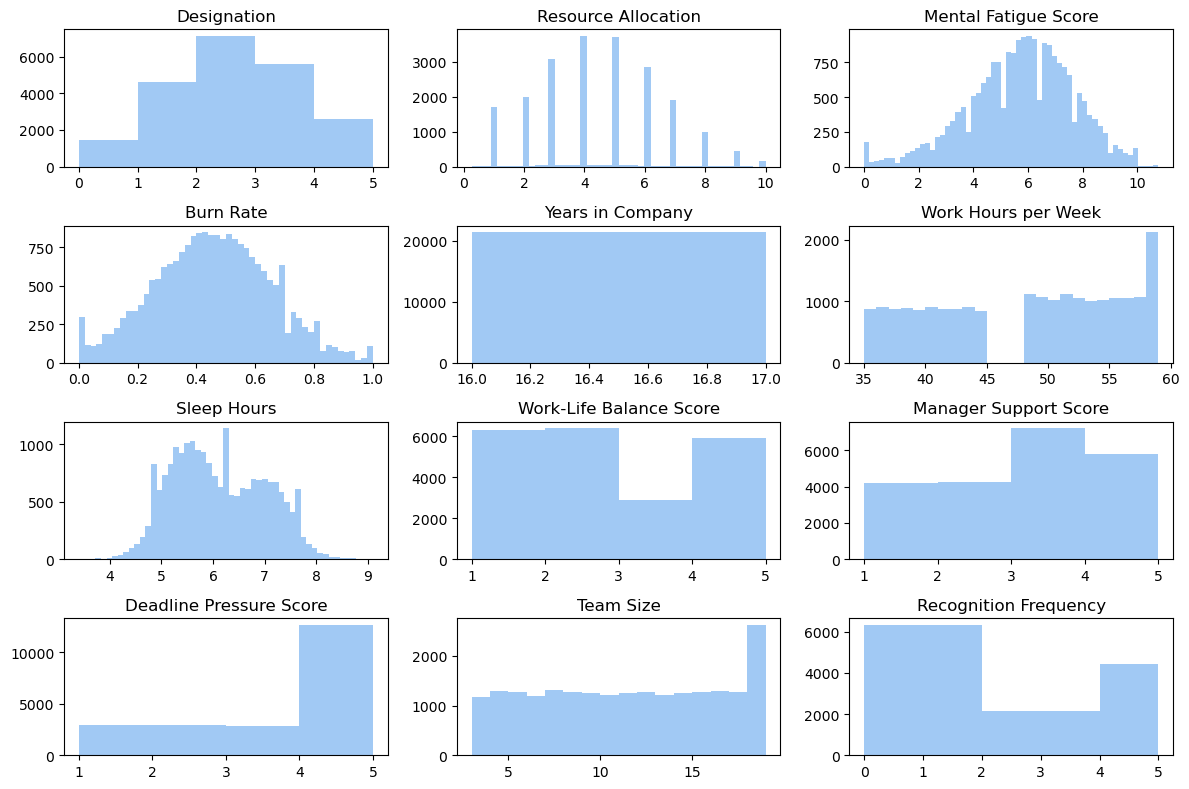

In [76]:
# Selecciona solo columnas numéricas
df_numericas = df.select_dtypes(include='number')

# Plot con subplots (uno por variable)
df_numericas.hist(bins='auto', figsize=(12, 8), grid=False)
plt.tight_layout()
plt.show()

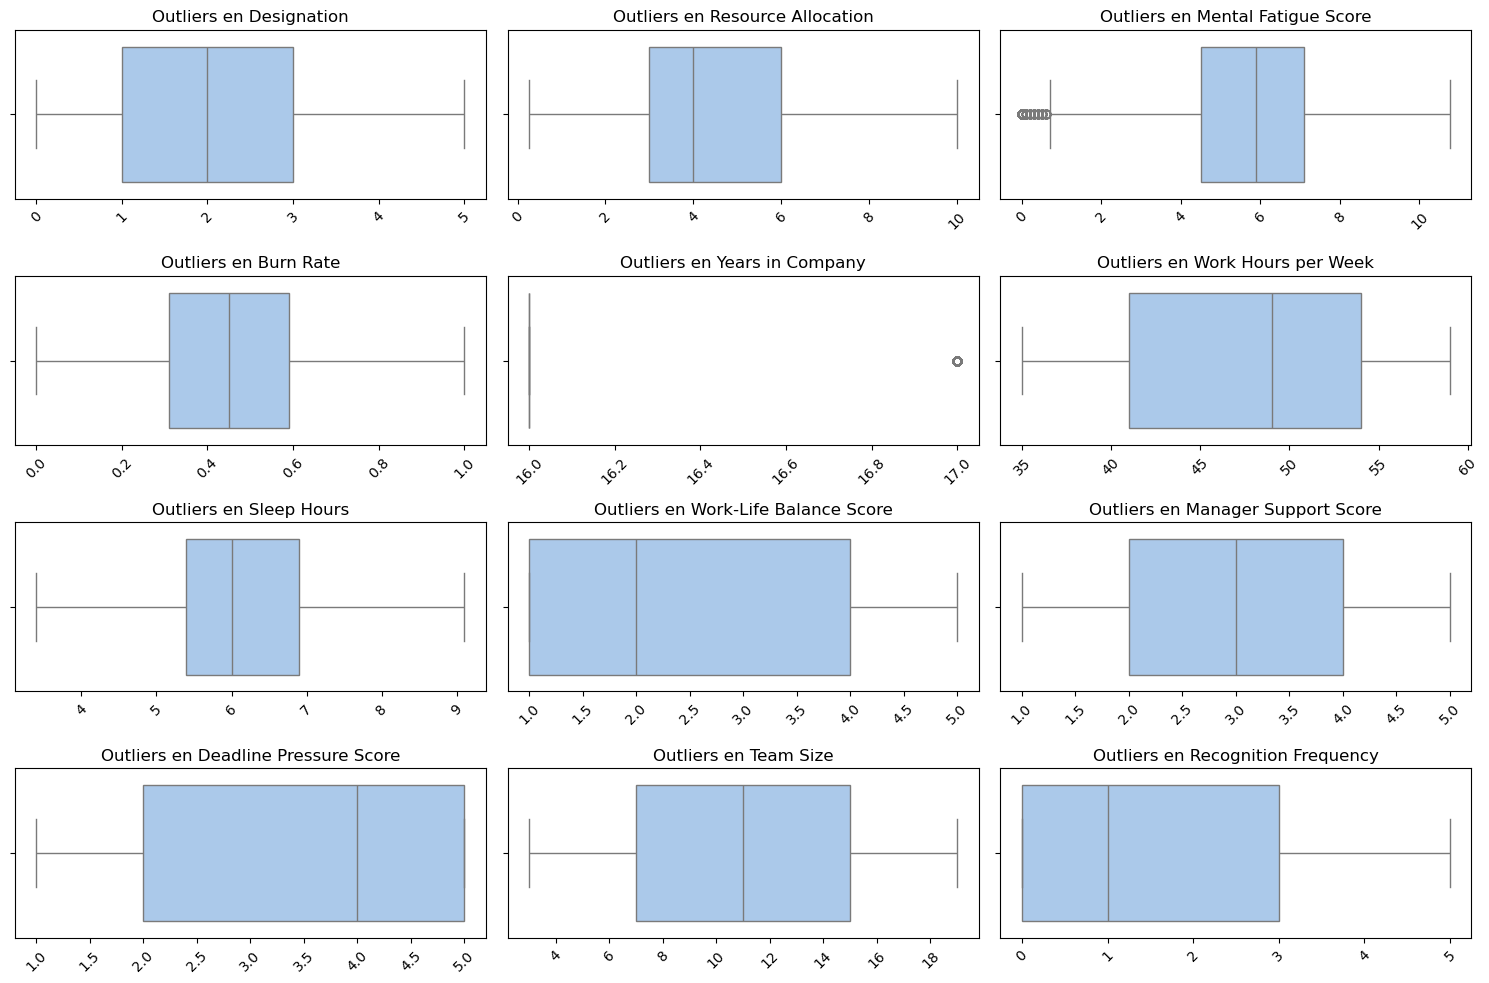

In [77]:
# Detectar outliers con boxplot
import math

# Seleccionar columnas numéricas
numeric_columns = df_numericas.columns

# Crear subplots en 3 columnas
n_cols = 3
n_rows = math.ceil(len(numeric_columns) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 2.5))

# Aplanar ejes para iterar fácilmente
axes = axes.flatten()

# Graficar cada boxplot en su correspondiente eje
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Outliers en {col}')
    axes[i].set_xlabel("")  # Opcional: quitar etiquetas para limpiar
    axes[i].tick_params(axis='x', labelrotation=45)

# Ocultar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Estos gráficos nos permiten identificar visualmente la presencia de outliers (valores atípicos) como puntos fuera de los “bigotes” del boxplot:

- En Mental Fatigue Score, hay varios valores atípicos bajos.

- En Years in Company, el gráfico se ve de esta manera ya que hay sólo dos valores posibles (16 o 17 años).

- Otras variables, como Team Size y Burn Rate, no muestran outliers visibles.

Analizamos la distribución bimodal de Sleep Hours. Se observa que puede estar asociada a la posibilidad de realizar trabajo remoto. Sin embargo, la distribución bimodal para el caso de aquellos trabajadores con posibilidad de treabajar remoto podría estar indicando dos modalidades de trabajo:
- Trabajo parcialmente remoto (híbrido)
- Trabajo completamente remoto

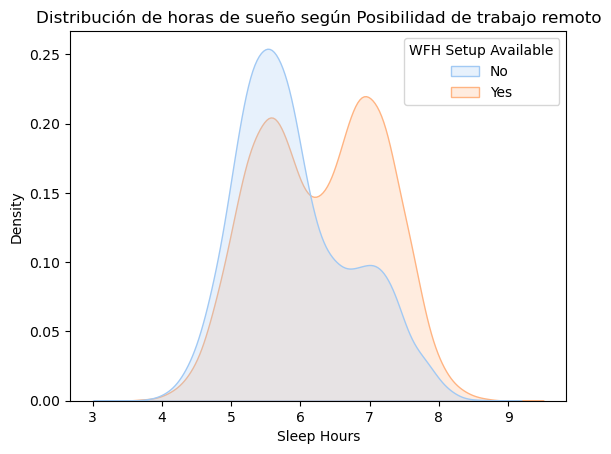

In [78]:
sns.kdeplot(data=df, x='Sleep Hours', hue='WFH Setup Available', fill=True)
plt.title('Distribución de horas de sueño según Posibilidad de trabajo remoto')
plt.show()

Se observa que para Burn Rate y Mental Fatigue Score las distribuciones son aproximadamente normales. Analizamos skewness (asimetría) y curtosis para ambos casos.

In [79]:
print(f"Asímetría de Burn Rate: {df['Burn Rate'].skew()}")
print(f"Curtosis de Burn Rate: {df['Burn Rate'].kurtosis()}")

Asímetría de Burn Rate: 0.04867674817731263
Curtosis de Burn Rate: -0.26037738904041996


**Burn Rate:**
- Asimetría cercana a cero: Aproximadamente simétrica
- Curtosis negativa cercana a cero: Aproximadamente normal, levemente más plana

In [80]:
print(f"Asímetría de Mental Fatigue Score: {df['Mental Fatigue Score'].skew()}")
print(f"Curtosis de Mental Fatigue Score: {df['Mental Fatigue Score'].kurtosis()}")

Asímetría de Mental Fatigue Score: -0.39682098525444975
Curtosis de Mental Fatigue Score: 0.13017419421515664


**Mental Fatigue Score:**
- Asimetría negativa, módulo menor a 0.5: Aproximadamente simétrica, levemente asimétrica hacia la derecha
- Curtosis positiva cercana a cero: Aproximadamente normal, levemente con más pico

### 5. Análisis de correlación entre variables

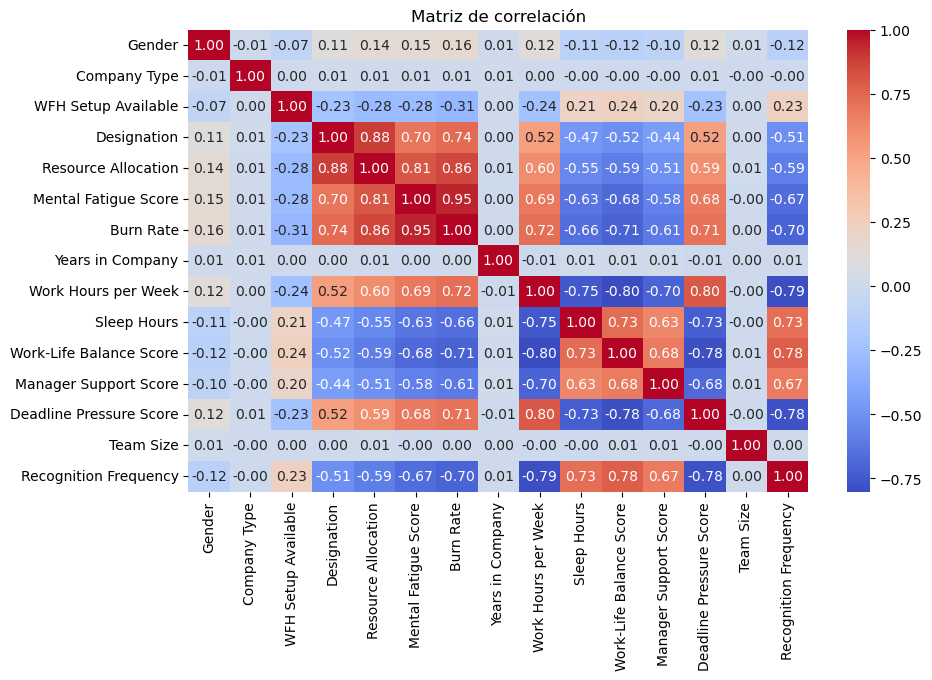

In [83]:
# Convertir las columnas object a code para poder analizar la correlación entre variables
# Se consideran variables 'Gender', 'Company Type', 'WFH Setup Available'
# Crear una copia del dataset limpio
df_codes = df.copy()

# Convertir columnas categóricas a códigos numéricos
categorical_columns = ['Gender', 'Company Type', 'WFH Setup Available']

for col in categorical_columns:
    df_codes[col] = df_codes[col].astype('category').cat.codes

# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df_codes.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

En la matriz de correlación se observan varios patrones relevantes sobre cómo se relacionan las variables con el nivel de agotamiento laboral (Burn Rate) y entre sí:

**Burn Rate tiene alta correlación positiva con:**

- Mental Fatigue Score (0.95)
- Resource Allocation (0.86)
- Designation (0.74)
- Work Hours per Week (0.72)
- Deadline Pressure Score (0.71)

Estas variables están fuertemente asociadas con un mayor agotamiento.

**Burn Rate tiene correlación negativa con:**

- Sleep Hours (-0.66)
- Work-Life Balance Score (-0.71)
- Manager Support Score (-0.61)
- Recognition Frequency (-0.70)

Es decir, más sueño, mejor balance, mayor apoyo y más reconocimiento tienden a reducir el burnout.

*Years in Company y Team Size no muestran correlación significativa con otras variables, por lo que podrían tener menor relevancia directa en el burnout.*

### 6. Análisis de las preguntas propuestas

¿Existen diferencias significativas en los niveles de agotamiento laboral entre empleados de diferentes tipos de compañías?

*Analizando el gráfico, no se observan diferencias en los niveles de burnout según si el tipo de compañía es de productos o servicios.*

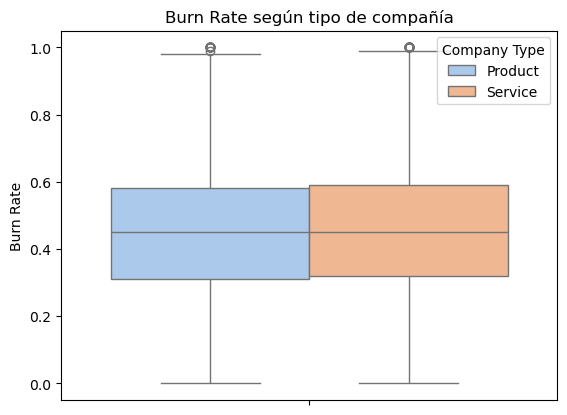

In [84]:
sns.boxplot(data=df, y='Burn Rate', hue='Company Type')
plt.title('Burn Rate según tipo de compañía')
plt.show()

¿En qué medida el apoyo percibido de la organización reduce los niveles de agotamiento laboral entre los empleados?

*Se observa que el nivel de agotamiento laboral es mayor para los empleados que perciben un menor apoyo de la organización, y que disminuye para los casos en que se percibe más apoyo. Además, para los casos en que se percibe menor apoyo (nivel 1 y 2) se observa una gran cantidad de outliers con valores altos (mayores a Q3 + 1.5 * IQR). Esto significa que en estos casos se observan tasas de agotamiento laboral muy superiores al resto de los encontrados en nuestra distribución.*

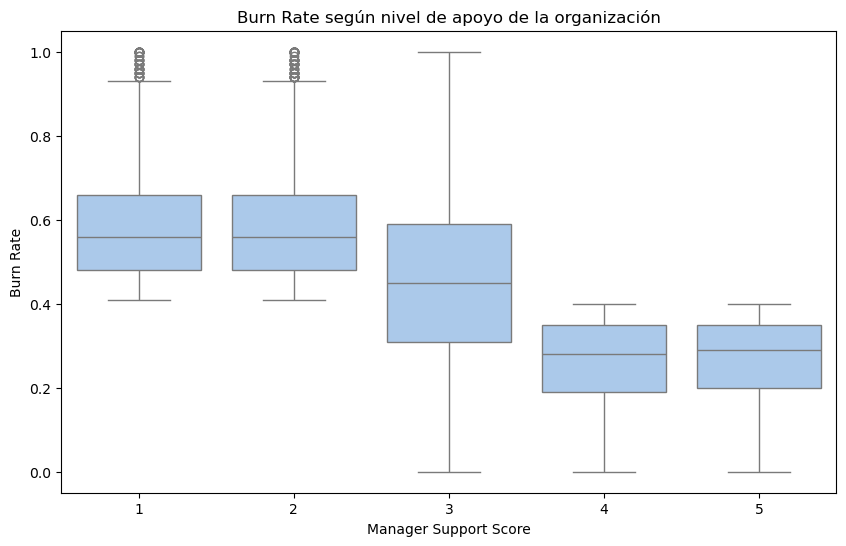

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Burn Rate', x='Manager Support Score')
plt.title('Burn Rate según nivel de apoyo de la organización')
plt.xlabel('Manager Support Score')
plt.ylabel('Burn Rate')
plt.show()

¿Cómo influye el equilibrio entre el trabajo y la vida personal, y la cantidad de horas de descanso en los niveles de agotamiento laboral?

*Se observa que en los casos en que el nivel de equilibrio entre trabajo y vida personal es más bajo, el nivel de agotamiento laboral es mayor, especialmente en los niveles 1 y 2. Además, similar a lo que ocurría en el caso anterior, se observan valores atípicos para el burn rate en los niveles 1 y 2, que están por encima de los valores encontrados en esta distribución. Con respecto a la cantidad de horas de descanso, se observa que las tasas de agotamiento laboral son más bajas cuando las horas de sueño son mayores a 6.5-7 hs. Ambos gráficos se condicen con lo esperado, es decir, que el agotamiento laboral es mayor cuanto peor es el equilibrio entre trabajo y vida laboral y menores son las horas de descanso.*

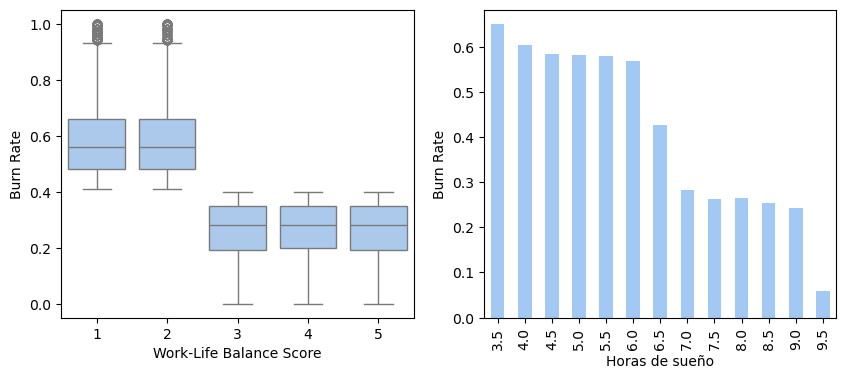

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Work-Life Balance Score
sns.boxplot(data=df, y='Burn Rate', x='Work-Life Balance Score', ax=ax[0])
plt.xlabel('Work-Life Balance Score')
plt.ylabel('Burn Rate')

# Horas de sueño - Agrupando los valores cada media hora y redondeando hacia arriba
df['Rango_Descanso'] = np.ceil(df['Sleep Hours'] * 2) / 2
df.groupby('Rango_Descanso')['Burn Rate'].mean().plot(kind='bar', ax=ax[1])
plt.xlabel('Horas de sueño')
plt.ylabel('Burn Rate')

plt.show()

¿Cómo varía el nivel de burnout según la antigüedad de los empleados, el género, el puesto y la disponibilidad de arreglos para trabajar en forma remota?

- *Con respecto a la antiguedad de los empleados no se observan diferencias, pero esto puede estar asociado a que todos los empleados tienen 16 o 17 años de experiencia, lo cual no se traduce en una diferencia en el burnout.*

- *Con respecto al género, se observa que para los hombres los niveles de agotamiento laboral son levemente mayores que para las mujeres. A su vez, se observa que para las mujeres se encuentran gran cantidad de valores atípicos, que están siempre por encima del resto de los valores de la distribución. Una hipótesis posible para analizar es si las mujeres con valores mayores de Burn Rate son madres, lo cual podría ser un factor que aumente la probabilidad de burnout.*

- *En cuanto al puesto, se observa que a medida que aumenta la jerarquía del cargo los niveles de burnout también aumentan.*
    - *El grupo con Designation = 5 (el más alto) presenta un Burn Rate cercano a 0.85.*
    - *El nivel más bajo (0) tiene un burnout notablemente menor.*
    - *Los niveles intermedios 3 y 4 muestran valores atípicos por encima de los del resto de la distribución. En este caso, podría plantearse la hipótesis de que los llamados mandos medios (puestos intermedios entre la alta dirección y el personal operativo) presentan mayores niveles de burnout.*

- *Con respecto a la posibilidad de trabajo remoto, se observa que quienes trabajan de manera estrictamente presencial presentan mayores niveles de burnout. Para quienes tienen posibilidad de trabajar de forma remota, los niveles de agotamiento son menores, aunque se observan también valores atípicos de agotamiento laboral que están por encima de los del resto de la distribución. Esto se relaciona con el análisis previo de esta variable, por lo que se plantea que dentro de quienes sí trabajan en forma remota debería haber dos categorías diferenciadas: trabajo completamente remoto y trabajo híbrido.*

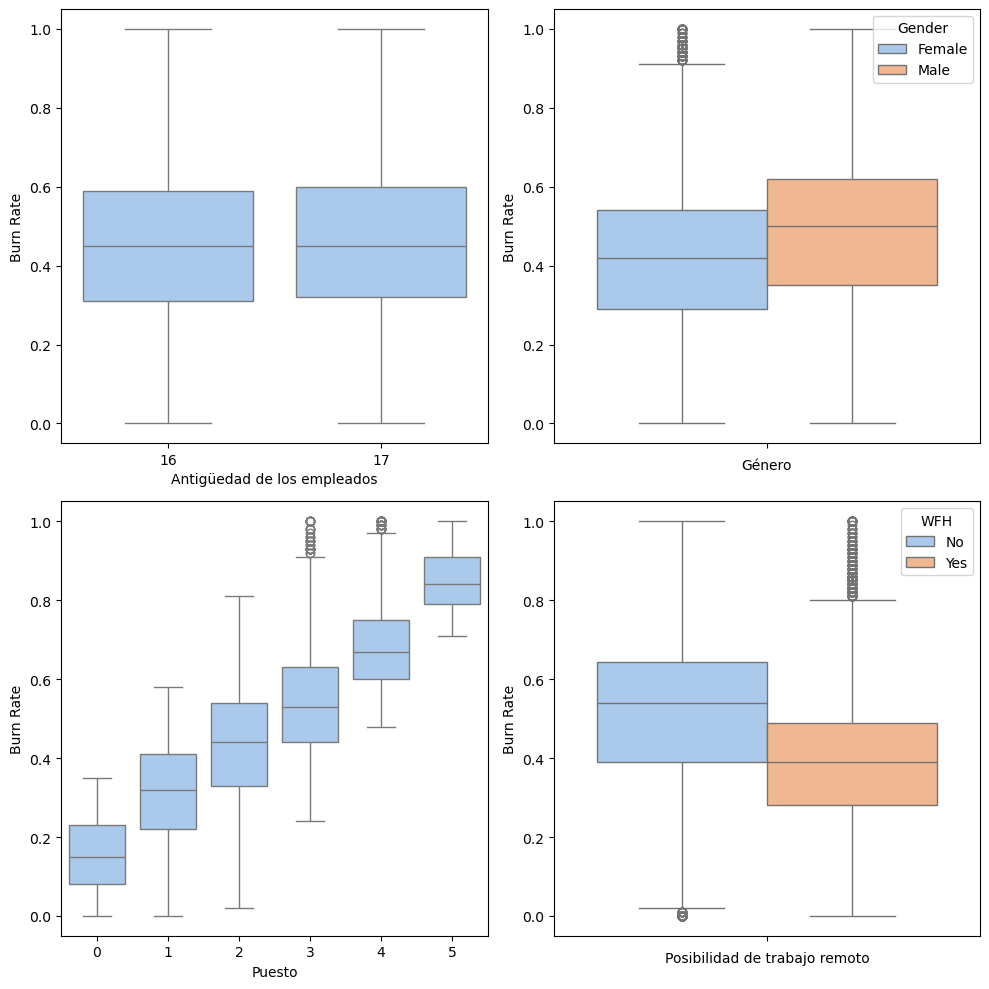

In [87]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Antigüedad
sns.boxplot(data=df, y='Burn Rate', x='Years in Company', ax=ax[0, 0])
ax[0, 0].set_xlabel('Antigüedad de los empleados')
ax[0, 0].set_ylabel('Burn Rate')

# Género
sns.boxplot(data=df, y='Burn Rate', hue='Gender', ax=ax[0, 1])
ax[0, 1].legend(title='Gender', loc='upper right')
ax[0, 1].set_xlabel('Género')
ax[0, 1].set_ylabel('Burn Rate')

# Puesto
sns.boxplot(data=df, y='Burn Rate', x='Designation', ax=ax[1, 0])
ax[1, 0].set_xlabel('Puesto')
ax[1, 0].set_ylabel('Burn Rate')

# Trabajo remoto
sns.boxplot(data=df, y='Burn Rate', hue='WFH Setup Available', ax=ax[1, 1])
ax[1, 1].legend(title='WFH', loc='upper right')
ax[1, 1].set_xlabel('Posibilidad de trabajo remoto')
ax[1, 1].set_ylabel('Burn Rate')

plt.tight_layout()
plt.show()


¿Existe un umbral crítico de horas de trabajo o fatiga mental a partir del cual el burnout se incrementa drásticamente?

*El objetivo es detectar si existe un punto de inflexión entre las horas trabajadas por semana y la fatiga mental a partil del cuál el burnout se incrementa drásticamente.*

- *En cuanto a las Horas de trabajo vs. Burnout, se observa un cambio abrupto alrededor de las 46-47 horas semanales. Antes de ese umbral, el aumento del Burn Rate es moderado. A partir de este punto, el burnout sube más rápido y se estabiliza en niveles altos.*

- *Por otra parte, la fatiga mental vs. Burnout muestra una relación claramente no lineal y creciente. A partir de un puntaje de fatiga mental cercano a 6 o 7, el burnout se acelera exponencialmente. Esto indica que incluso diferencias pequeñas en niveles de fatiga alta pueden tener gran impacto en el agotamiento.*

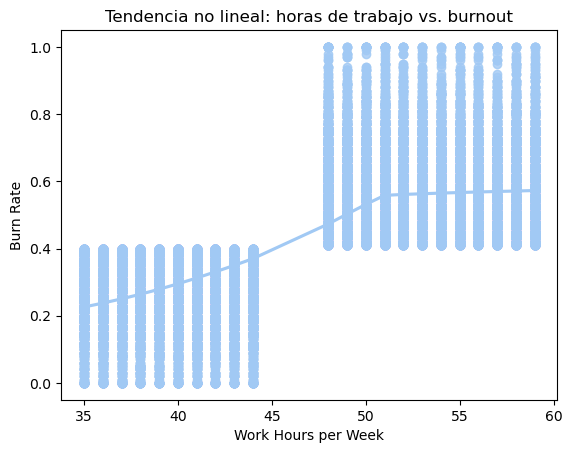

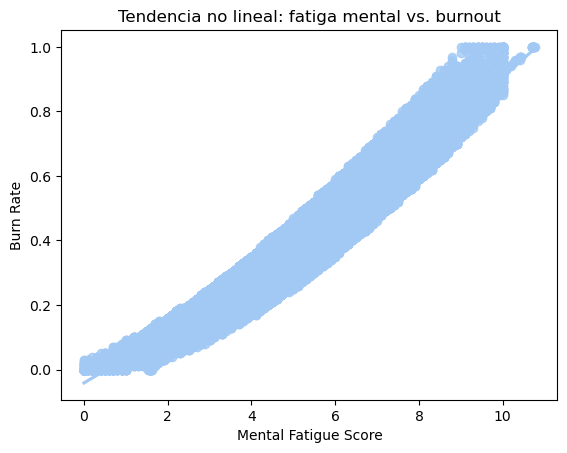

In [88]:
# Relación entre horas de trabajo y burnout
sns.regplot(data=df, x='Work Hours per Week', y='Burn Rate', lowess=True)
plt.title('Tendencia no lineal: horas de trabajo vs. burnout')
plt.show()

# Relación entre fatiga mental y burnout
sns.regplot(data=df, x='Mental Fatigue Score', y='Burn Rate', lowess=True)
plt.title('Tendencia no lineal: fatiga mental vs. burnout')
plt.show()